BASELINE

Total images: 1797
#---------------------------------------------------------------------#
KNeighborsClassifier
Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      0.98      0.99        52
           2       1.00      1.00      1.00        48
           3       0.95      1.00      0.98        40
           4       1.00      0.94      0.97        53
           5       0.96      0.98      0.97        50
           6       0.98      1.00      0.99        47
           7       0.93      1.00      0.96        40
           8       0.97      0.97      0.97        36
           9       1.00      0.93      0.97        46

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450


Confusion matrix:
[[38  0  0  0  0  0  0  0  0  0]
 [ 0 5

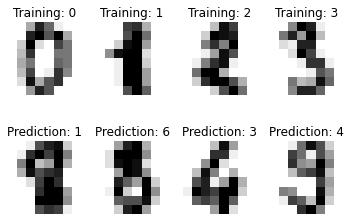

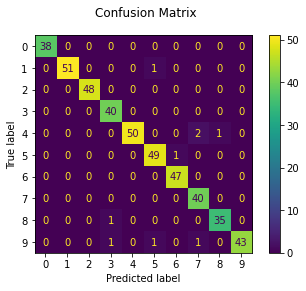

KNN	Accuracy: 0.98	Recall: 0.98


#---------------------------------------------------------------------#
SGDClassifier
Classification report for classifier SGDClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.98      0.83      0.90        52
           2       1.00      0.98      0.99        48
           3       0.95      0.93      0.94        40
           4       1.00      0.94      0.97        53
           5       0.96      0.96      0.96        50
           6       0.96      1.00      0.98        47
           7       1.00      0.97      0.99        40
           8       0.75      1.00      0.86        36
           9       0.91      0.91      0.91        46

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.96      0.95      0.95       450


Confusion matrix:
[[38  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  1  

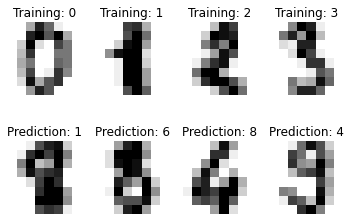

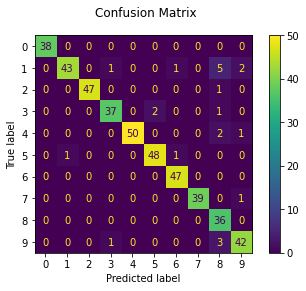

SGD	Accuracy: 0.949	Recall: 0.949


#---------------------------------------------------------------------#
DecisionTreeClassifier
Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       0.84      0.88      0.86        52
           2       0.93      0.81      0.87        48
           3       0.83      0.85      0.84        40
           4       0.93      0.75      0.83        53
           5       0.90      0.88      0.89        50
           6       0.81      0.98      0.88        47
           7       0.86      0.90      0.88        40
           8       0.83      0.83      0.83        36
           9       0.81      0.85      0.83        46

    accuracy                           0.87       450
   macro avg       0.87      0.87      0.87       450
weighted avg       0.87      0.87      0.87       450


Confusion matrix:
[[36  0  0  0  0  1  1  0  0

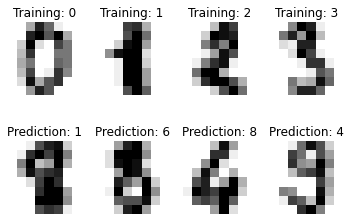

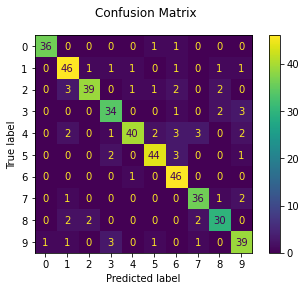

DT	Accuracy: 0.867	Recall: 0.867




In [200]:
# --- Step 1. Import relevant packages --- #
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

baseline = []

def performance(digits, image, classifier, X_test, predicted, y_test):
    classifier_name = str(classifier).replace('()','')
    print(f'#---------------------------------------------------------------------#\n\033[1m{classifier_name}\033[0m')
    if 'KN' in classifier_name:
        classifier_name = 'KNN'
    elif 'SGD' in classifier_name:
        classifier_name = 'SGD'
    else:
        classifier_name = 'DT'
    _, axes = plt.subplots(2, 4)
    images_and_labels = list(zip(digits.images, digits.target))
    for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title('Training: %i' % label)

    images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
    for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title('Prediction: %i' % prediction)

    # --- Step 7. Performance --- #
    print("Classification report for classifier \033[1m%s\033[0m:\n%s\n"
          % (classifier, metrics.classification_report(y_test, predicted)))
    disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
    disp.figure_.suptitle("Confusion Matrix")
    print("Confusion matrix:\n%s" % disp.confusion_matrix)
    plt.show()
    
    accuracy = round(metrics.accuracy_score(y_test, predicted, normalize=True, sample_weight=None),3)
    recall = round(metrics.recall_score(y_test, predicted, labels = [0,1,2,3,4,5,6,7,8,9], average = 'micro'),3)
    print(f'{classifier_name}\tAccuracy: {accuracy}\tRecall: {recall}\n\n')
    baseline.append((f'{classifier_name}\tAccuracy: {accuracy}\tRecall: {recall}\n\n'))

# --- Start --- #
print('\033[1mBASELINE\n\033[0m')
# The digits dataset
digits = load_digits()


# --- Step 2. Load the images using sklearn’s load_digits(). --- #
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data_size = len(digits.data)
print('Total images:',data_size)


# --- Step 3. Split the images using sklearn’s train_test_split() --- #
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)


# --- KNeighborsClassifier --- #
# Create a classifier: a support vector classifier
classifier = KNeighborsClassifier()
# --- Step 5. Fit the model to the training data. --- #
classifier.fit(X_train, y_train)
# --- Step 6. Use the trained/fitted model to evaluate the test data. --- #
predicted = classifier.predict(X_test)
# --- Step 7. Performance --- #
performance(digits, image, classifier, X_test, predicted, y_test)


# --- SGDClassifier --- #
# Create a classifier: a support vector classifier
classifier = SGDClassifier()
# --- Step 5. Fit the model to the training data. --- #
classifier.fit(X_train, y_train)
# --- Step 6. Use the trained/fitted model to evaluate the test data. --- #
predicted = classifier.predict(X_test)
# --- Step 7. Performance --- #
performance(digits, image, classifier, X_test, predicted, y_test)

# --- DecisionTreeClassifier --- #
# Create a classifier: a support vector classifier
classifier = DecisionTreeClassifier()
# --- Step 5. Fit the model to the training data. --- #
classifier.fit(X_train, y_train)
# --- Step 6. Use the trained/fitted model to evaluate the test data. --- #
predicted = classifier.predict(X_test)
# --- Step 7. Performance --- #
performance(digits, image, classifier, X_test, predicted, y_test)

In [166]:
'''
KNN n_neighbours tuning
The nearest neighbour parameter K is found by using brute-force.
There are 3 nested loop. First runs the classifier for 20 times to get all results for one neighbour value.
Second loop adjusts the neighbourhood value from 1 to 10.
Third loop runs the entire process 10 times so as to give a better overview of results.
For a 8x8 image, going beyond 10 neighbours will not give good accuracy.
'''
from collections import defaultdict
from statistics import mean
import operator
from sklearn.datasets import load_digits

def main_():
    neighbour_score_dict = defaultdict(list)
    neighbour_mean_score_dict = {}
    digits = load_digits()
    
    for i in range(1,10): #neighbours
        for j in range(20): #no. of iterations
            X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, shuffle=True)
#             classifier_KNN = KNeighborsClassifier(n_neighbors = i, weights = 'distance', algorithm='brute')
            classifier_KNN = KNeighborsClassifier(n_neighbors = i)
            classifier_KNN.fit(X_train, y_train)
            predicted_KNN = classifier_KNN.predict(X_test)
            accuracy = classifier_KNN.score(X_test, y_test)
            recall = metrics.recall_score(y_test, predicted_KNN, average='weighted')
            neighbour_score_dict[i].append(accuracy)

    for k,v in neighbour_score_dict.items():
        average_score = mean(neighbour_score_dict[k])
        neighbour_mean_score_dict[k] = average_score

    # print(neighbour_mean_score_dict)
    best_n = max(neighbour_mean_score_dict, key=lambda k: neighbour_mean_score_dict[k])
    # print(best_n)
    print('Best n value for KNN:', best_n)

for i in range(20):
    main_()
    
#using weights = 'distance' and algorithm = 'brute'
# Best n value for KNN: 4
# Best n value for KNN: 2
# Best n value for KNN: 3
# Best n value for KNN: 2
# Best n value for KNN: 1
# Best n value for KNN: 3
# Best n value for KNN: 2
# Best n value for KNN: 2
# Best n value for KNN: 2
# Best n value for KNN: 2

#using just n_neighbours
# Best n value for KNN: 3
# Best n value for KNN: 1
# Best n value for KNN: 5
# Best n value for KNN: 1
# Best n value for KNN: 1
# Best n value for KNN: 1
# Best n value for KNN: 1
# Best n value for KNN: 5
# Best n value for KNN: 3
# Best n value for KNN: 4
# Here we can see that 5 out of 10 times, n_neighbours=1 gives best average accuracy on this dataset.

#Running the entire process for 20 times:
# Best n value for KNN: 1
# Best n value for KNN: 3
# Best n value for KNN: 1
# Best n value for KNN: 5
# Best n value for KNN: 1
# Best n value for KNN: 1
# Best n value for KNN: 1
# Best n value for KNN: 1
# Best n value for KNN: 1
# Best n value for KNN: 3
# Best n value for KNN: 3
# Best n value for KNN: 1
# Best n value for KNN: 1
# Best n value for KNN: 1
# Best n value for KNN: 1
# Best n value for KNN: 1
# Best n value for KNN: 1
# Best n value for KNN: 3
# Best n value for KNN: 1
# Best n value for KNN: 3

# Here we can see that 14 out of 20 times, n_neighbours=1 gives best average accuracy on this dataset.

Best n value for KNN: 1
Best n value for KNN: 3
Best n value for KNN: 1
Best n value for KNN: 5
Best n value for KNN: 1
Best n value for KNN: 1
Best n value for KNN: 1
Best n value for KNN: 1
Best n value for KNN: 1
Best n value for KNN: 3
Best n value for KNN: 3
Best n value for KNN: 1
Best n value for KNN: 1
Best n value for KNN: 1
Best n value for KNN: 1
Best n value for KNN: 1
Best n value for KNN: 1
Best n value for KNN: 3
Best n value for KNN: 1
Best n value for KNN: 3


'\nHere we can see that 5 out of 10 times, K=1 gives best average accuracy on this dataset.\n'

BASELINE
KNN	Accuracy: 0.98	Recall: 0.98
SGD	Accuracy: 0.949	Recall: 0.949
DT	Accuracy: 0.867	Recall: 0.867

IMPROVEMENT

COMP9517 Week5 Lab - z5240067
KNN	Accuracy: 0.998	Recall: 0.998
SGD	Accuracy: 0.944	Recall: 0.944
DT	Accuracy: 0.831	Recall: 0.831

Confusion matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0  0 48  0  0  0  0]
 [ 0  0  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0  0  0 46  0  0]
 [ 0  0  0  0  0  0  0  0 47  0]
 [ 0  1  0  0  0  0  0  0  0 40]]


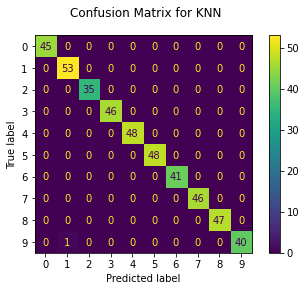

In [204]:
# --- Step 1. Import relevant packages --- #
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


def performance(classifier, X_test, y_test, predicted):
    classifier_name = str(classifier).replace('()','')
    if 'KN' in classifier_name:
        classifier_name = 'KNN'
    elif 'SGD' in classifier_name:
        classifier_name = 'SGD'
    else:
        classifier_name = 'DT'

#     accuracy = round(metrics.accuracy_score(y_test, predicted),3)
    accuracy = round(classifier.score(X_test, y_test),3)
#     KNN_accuracy = KNN_classifer.score(x_test, y_test)
    recall = round(metrics.recall_score(y_test, predicted, average = 'weighted'),3)
    print(f'{classifier_name}\tAccuracy: {accuracy}\tRecall: {recall}')

# ----------------------------MAIN---------------------------------#
print('\033[1mBASELINE\033[0m')
for e in baseline:
    print(e.rstrip('\n'))
    
# --- Start --- #
print('\n\033[1mIMPROVEMENT\033[0m')
print('\nCOMP9517 Week5 Lab - z5240067')
# The digits dataset
digits = load_digits()

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, shuffle=True)

# ----------------------- KNeighborsClassifier ------------------------- #
classifier_KNN = KNeighborsClassifier(n_neighbors = 1)
classifier_KNN.fit(X_train, y_train)
predicted_KNN = classifier_KNN.predict(X_test)
performance(classifier_KNN, X_test,  y_test, predicted_KNN)

# ------------------------ SGDClassifier ------------------------------- #
classifier = SGDClassifier(loss="modified_huber", penalty="elasticnet")
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)
performance(classifier, X_test, y_test, predicted)

# ------------------------ DecisionTreeClassifier ----------------------- #
# classifier = DecisionTreeClassifier(max_depth = 30, max_features=25, max_leaf_nodes=99, ccp_alpha=2)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)
performance(classifier, X_test, y_test, predicted)


# -------------- Print confusion matrix for best classifier ------------- #
disp = metrics.plot_confusion_matrix(classifier_KNN, X_test, y_test)
disp.figure_.suptitle(f'Confusion Matrix for KNN')
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
plt.show()
